In [1]:
import os
import pandas as pd
import numpy as np
from typing import Union, List, Literal, Dict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
Filepath = 'C:/Users/gnapika/Downloads/5gproject/Dataset'
pd.set_option('display.max_colwidth',200)

In [5]:
def Load_Data(file_path: str) -> List[pd.DataFrame]:
  train = pd.read_csv(file_path+'/Train.csv')
  test = pd.read_csv(file_path+'/Test.csv')
  variables = pd.read_csv(file_path+'/VariableDefinitions.csv')

  return train, test,variables


In [6]:
Train, Test,Variables = Load_Data(Filepath)

### Data Exploration

In [7]:
Train.head(3)

,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0


In [8]:
Test.head(3)

,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area
0,Id_ln0e0hfrgx,1624374179,pc2,-97.121875,-12.923750,-87.554375,13.293,39276.0,24.0,20,...,23.05,14.55,0.59,1013.6,2.27,0.83,3.0,16.093,3.07702,Avenue
1,Id_svf7nz9fxv,1624366264,pc4,-65.202500,-9.944375,-35.501875,21.823,39566.0,25.0,20,...,21.56,13.92,0.62,1013.6,2.42,0.95,4.0,16.093,0.66000,Park
2,Id_ww2mh07gwj,1624375795,pc2,-79.298125,-17.468750,-74.823750,24.114,41900.0,27.0,20,...,22.93,14.65,0.60,1013.5,2.26,0.85,3.0,16.093,2.49330,Park


In [9]:
Train.select_dtypes(include=['object']).columns
Test.select_dtypes(include=['object']).columns

Index(['id', 'device', 'area'], dtype='object')

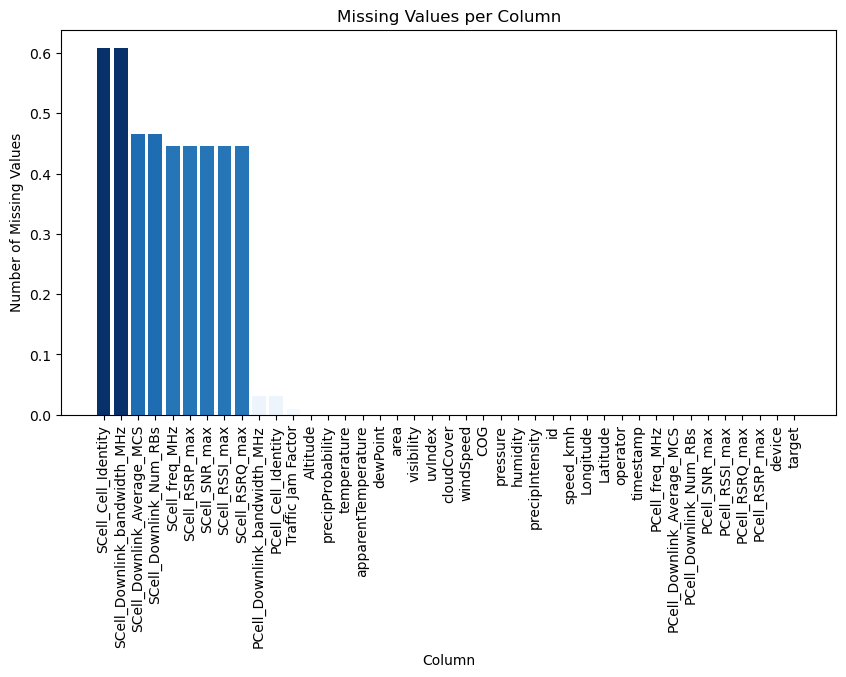

In [10]:
missing_values = Train.isna().sum()/ Train.shape[0]
missing_values = missing_values.sort_values(ascending=False)


# Normalize the data to be between 0 and 1
norm = plt.Normalize(missing_values.values.min(), missing_values.values.max())
# Create a colormap
cmap = cm.ScalarMappable(norm=norm, cmap='Blues')
# Generate colors for each bar
colors = [cmap.to_rgba(val) for val in missing_values.values]

# Create bar plot of missing values
plt.figure(figsize=(10,5))
plt.bar(missing_values.index, missing_values.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()



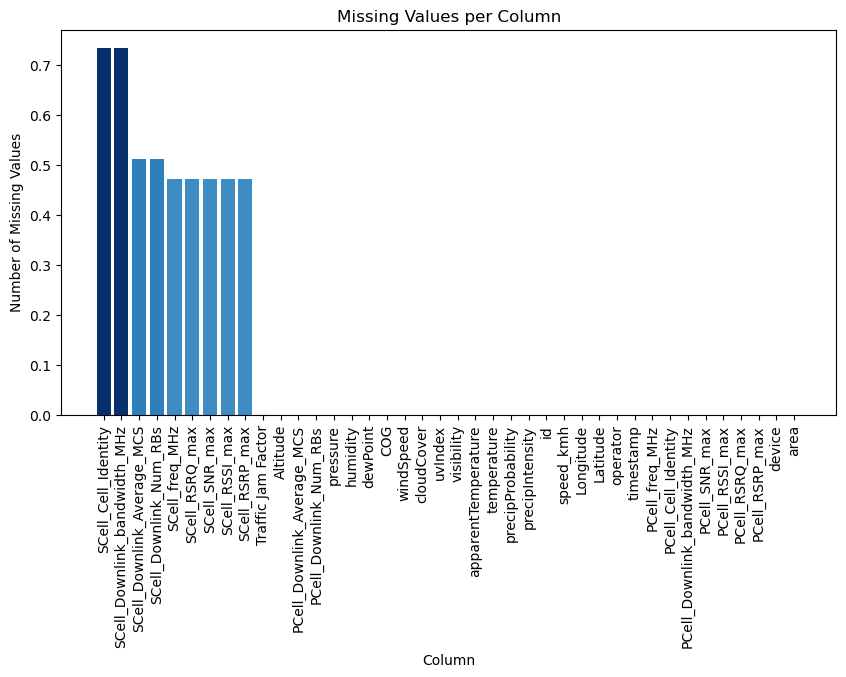

In [11]:
missing_values = Test.isna().sum()/ Test.shape[0]
missing_values = missing_values.sort_values(ascending=False)
import matplotlib.cm as cm

# Normalize the data to be between 0 and 1
norm = plt.Normalize(missing_values.values.min(), missing_values.values.max())
# Create a colormap
cmap = cm.ScalarMappable(norm=norm, cmap='Blues')
# Generate colors for each bar
colors = [cmap.to_rgba(val) for val in missing_values.values]

# Create bar plot of missing values
plt.figure(figsize=(10,5))
plt.bar(missing_values.index, missing_values.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()